In [1]:
#normal imports
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

#ML improts
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#for evaluating ML results
from sklearn import metrics

#to import Affairs dataset
import statsmodels.api as sm

In [2]:
df = sm.datasets.fair.load_pandas().data
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [3]:
# add a flag to indicate the affair
def affair_check(x):
    if x == 0:
        return 0
    else:
        return 1

In [4]:
df["Had_Affair"] = df["affairs"].apply(affair_check)

In [5]:
df

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_Affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1
...,...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000,0


In [6]:
# check avg values of our metrics for Had_Affair column
df.groupby(by="Had_Affair").mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
Had_Affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


<AxesSubplot:xlabel='age', ylabel='count'>

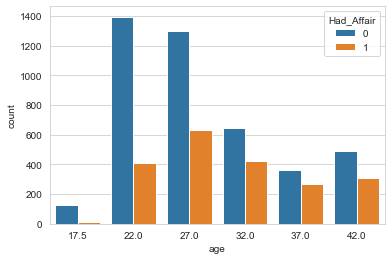

In [11]:
# lets analyse data by creating some vizes
sns.countplot(x='age', data=df, hue='Had_Affair')

<AxesSubplot:xlabel='yrs_married', ylabel='count'>

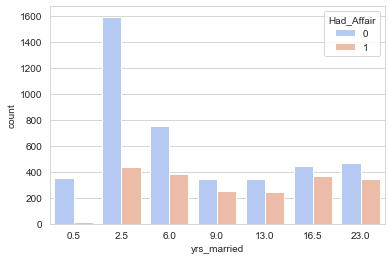

In [12]:
sns.countplot(x='yrs_married', data=df, hue='Had_Affair', palette='coolwarm')

<AxesSubplot:xlabel='children', ylabel='count'>

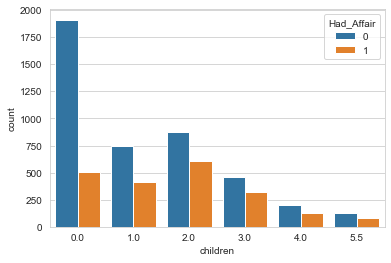

In [13]:
sns.countplot(x='children', data=df, hue='Had_Affair')

In [17]:
# Since occupation & husband's occupation columns are categorical, we need to create dummies for these
occ_dummies = pd.get_dummies(df['occupation'])
hus_occ_dummies = pd.get_dummies(df['occupation_husb'])

In [21]:
# create readable columns for dummies
occ_dummies.columns = ['occ1', 'occ2', 'occ3', 'occ4', 'occ5', 'occ6']
hus_occ_dummies.columns = ['hus_occ1', 'hus_occ2', 'hus_occ3', 'hus_occ4', 'hus_occ5', 'hus_occ6']

In [24]:
# drop occupation & occupation_husb from dataframe and replace with dummies
X = df.drop(['occupation', 'occupation_husb', 'Had_Affair'], axis=1)

In [26]:
dummies = pd.concat([occ_dummies, hus_occ_dummies], axis=1)

In [27]:
# concat X & Dummies
X = pd.concat([X, dummies], axis=1)

In [29]:
# define Y which is Had_Affair column
Y = df.Had_Affair

In [30]:
# avoid multicollinearity
X = X.drop(['occ1', 'hus_occ1'], axis=1)

In [32]:
# drop affairs column as we already have Had_Affairs
X = X.drop('affairs', axis=1)

In [33]:
X

,rate_marriage,age,yrs_married,children,religious,educ,occ2,occ3,occ4,occ5,occ6,hus_occ2,hus_occ3,hus_occ4,hus_occ5,hus_occ6
0,3.0,32.0,9.0,3.0,3.0,17.0,1,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,0,1,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0,0,0,1,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,0,0,1,0,0,0,1,0,0,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,0,0,0,1,0,0,0,0,1,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,0,1,0,0,0,0,0,0,0,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,0,1,0,0,0,0,0,1,0,0


In [34]:
Y

0       1
1       1
2       1
3       1
4       1
       ..
6361    0
6362    0
6363    0
6364    0
6365    0
Name: Had_Affair, Length: 6366, dtype: int64

In [35]:
# to use Y in sklearn, we need Y as 1-D array
Y = np.ravel(Y)
Y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [36]:
# run logistic regression using sklearn
# 1. create a model, 2. fit the data into the model, 3. Check accuracy score, 
# 4. Split data into training/testing set to see if results improve

In [40]:
log_model = LogisticRegression(max_iter=10000)
# we increased max iter to 10,000 as it was not converging with default iter of 1000
# we can use different solver (optimization algorithm) if the default one was not converging
# log_model = LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=10000) 
log_model.fit(X, Y)
log_model.score(X,Y)

0.726358781024191

In [41]:
# 0.726 or 73% is our accuracy rating
# In our dataset, 32% women had affair
# Check null error rate:
# Meaning if we assumed that our model only predicted "no affair" for all women, then our model would be 68% accurate
# Our model is still better than null error rate, but no much better

# Now, lets check coefficients of our model to checck what seemed to be stronger predictors

In [42]:
coeff_df = DataFrame(zip(X.columns, np.transpose(log_model.coef_)))

In [43]:
coeff_df

,0,1
0,rate_marriage,[-0.709988440070932]
1,age,[-0.06093087582895424]
2,yrs_married,[0.10783889186374607]
3,children,[0.015252473797413867]
4,religious,[-0.3741625620051047]
5,educ,[-0.0015007388184528408]
6,occ2,[0.042798235777034364]
7,occ3,[0.35377163797980143]
8,occ4,[0.12009703690100232]
9,occ5,[0.6998401063097865]


In [44]:
# a +ve coeff implies that increase in the predictor will increase the chance of affair while
# -ve coeff implies that increase in the predictor will decrease the chance of affair

In [45]:
# Training & Testing
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [49]:
log_model2 = LogisticRegression(max_iter=10000)
log_model2.fit(X_train, Y_train)

LogisticRegression(max_iter=10000)

In [50]:
# We'll use predict method to predict the classification for test set and then we'll re-evaluate accuracy score
class_predict = log_model2.predict(X_test)

In [51]:
# compare predicted test classes to actual test classes
print(metrics.accuracy_score(Y_test, class_predict))

0.7129396984924623


In [52]:
# we are pretty much getting same accuracy as earlier i.e. ~72%

In [53]:
# Now to imrove our model, we can try some regularization techniques or use non-linear model